In [51]:
#!pip install -q -r requirements.txt


## 1.Import Dependencies

In [52]:
import numpy as np 
import pandas as pd

In [53]:
df=pd.read_csv("data\\raw\\ChurnModelling.csv")
df.head(10)

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Jack,Smith,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Carol,Wilson,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Grace,Wilson,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,Hank,Jones,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,Eva,Wilson,684,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


In [54]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


## 3. Handling Missing Values 

In [55]:
df_cp=df.copy()
df_cp=df_cp.dropna(axis=0)
df_cp.isnull().sum()

RowNumber          0
CustomerId         0
Firstname          0
Lastname           0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3.2 Imputation

### 3.2.1 Age Imputation

KNN 
mean/mode


In [56]:
mean=df['Age'].mean().round(2)
median=df['Age'].median()

print(f'Mean of Age: {mean}')
print(f'Median of Age: {median}')

Mean of Age: 38.91
Median of Age: 37.0


In [57]:
import sys, subprocess, pkgutil
if pkgutil.find_loader('seaborn') is None:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'seaborn'])
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

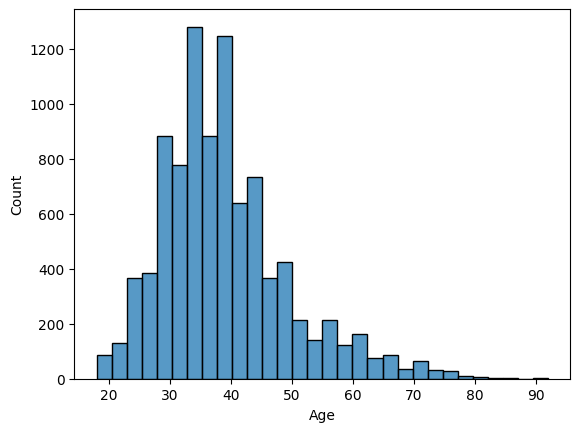

In [58]:
sns.histplot(data=df,x="Age",bins=30)

In [59]:
df_impute=df.copy()
df_impute.loc[:,'Age']=df_impute['Age'].fillna(mean)
df.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [60]:
df_impute.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [61]:
df_impute.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [65]:
from enum import Enum
from pydantic import BaseModel
from dotenv import load_dotenv
import groq

class Gender(str,Enum):
    MALE='Male'
    FEMALE='Female'

class GenderPrediction(BaseModel):
    first_name:str
    last_name:str
    pred_gender:Gender #to get structured output

def predict_gender(first_name:str,last_name:str):
    prompt=f""" what is the most Likely gender(Male or Female) for someone with the first name 
    "{first_name}" and last name "{last_name}"?
    you response only consists of the one Word: 
    Male or Female
      
       
    """
    response=groq.Groq().chat.completions.create(model='llama-3.3-70b-versatile',
                                                 messages=[{"role":"user","content":prompt}])    
    
    predicted_gender=response.choices[0].message.content.strip()
    return predicted_gender

ModuleNotFoundError: No module named 'groq'

In [63]:
load_dotenv()

True

In [64]:
predict_gender("Awash","Niran")

NameError: name 'groq' is not defined